# Heart Disease Detection using Machine Learning and Deep Learning

## Project Overview
This project implements heart disease detection using multiple approaches:
1. **Tabular Data Analysis**: Cleveland Heart Disease dataset with traditional ML models
2. **ECG Signal Analysis**: MIT-BIH Arrhythmia Database with Deep Learning models

## Datasets
- **Cleveland Heart Disease Dataset**: Clinical features (age, BP, cholesterol, etc.)
- **MIT-BIH Arrhythmia Database**: ECG signal recordings

## Project Structure
- **Section A**: Data Loading and Exploration
- **Section B**: Data Preprocessing
- **Section C**: Baseline Machine Learning Models
- **Section D**: Deep Learning Models
- **Section E**: Evaluation Metrics and Visualization

## Section A: Data Loading and Exploration

### A1. Import Required Libraries
First, we'll import all necessary libraries for data manipulation, visualization, and modeling.

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Traditional ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ECG Signal Processing
import wfdb
from scipy.signal import butter, filtfilt
import librosa

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

All libraries imported successfully!
TensorFlow version: 2.20.0
NumPy version: 2.3.4
Pandas version: 2.3.3


### A2. Load Cleveland Heart Disease Dataset (Tabular Data)

In [3]:
# Load the Cleveland heart disease dataset
heart_df = pd.read_csv('datasets/cleveland/heart.csv')

print("Dataset loaded successfully!")
print(f"Shape: {heart_df.shape}")
print(f"\nFirst few rows:")
heart_df.head()

Dataset loaded successfully!
Shape: (303, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Dataset information
print("Dataset Information:")
heart_df.info()
print("\nStatistical Summary:")
heart_df.describe()
print("\nMissing Values:")
print(heart_df.isnull().sum())
print("\nTarget Distribution:")
print(heart_df['target'].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Statistical Summary:

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca   

### A3. Load MIT-BIH ECG Dataset (Signal Data)

In [5]:
# Load a sample ECG record from MIT-BIH database
record_number = '100'
record_path = f'datasets/mit-bih/{record_number}'

# Read the record
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'atr')

print(f"Record {record_number} loaded successfully!")
print(f"Sampling frequency: {record.fs} Hz")
print(f"Signal shape: {record.p_signal.shape}")
print(f"Number of annotations: {len(annotation.sample)}")
print(f"Annotation symbols (first 10): {annotation.symbol[:10]}")

Record 100 loaded successfully!
Sampling frequency: 360 Hz
Signal shape: (650000, 2)
Number of annotations: 2274
Annotation symbols (first 10): ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N']


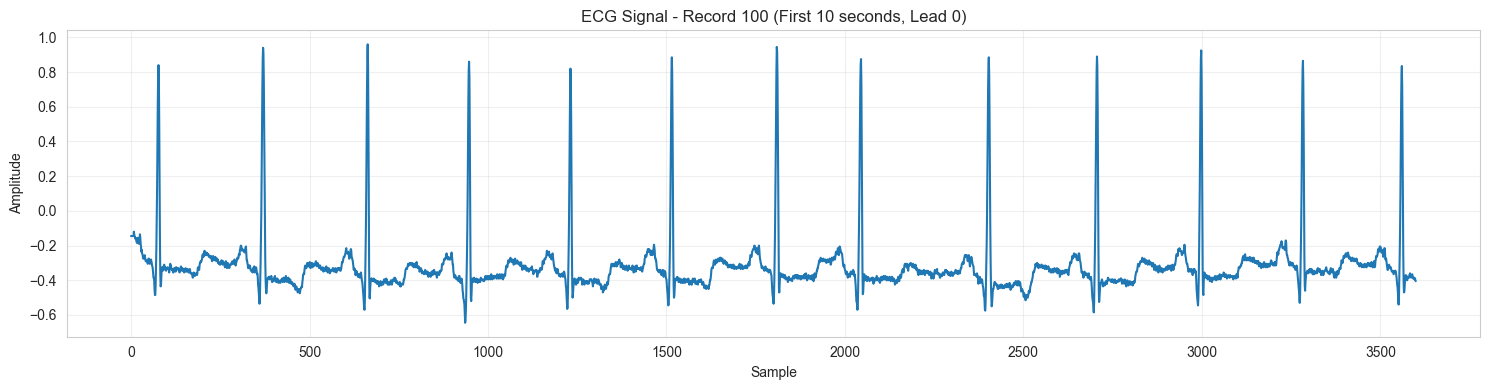

ECG visualization complete!


In [6]:
# Visualize a short segment of ECG signal
segment_start = 0
segment_duration = 10  # seconds
segment_samples = segment_duration * record.fs

plt.figure(figsize=(15, 4))
plt.plot(record.p_signal[segment_start:segment_start+segment_samples, 0])
plt.title(f'ECG Signal - Record {record_number} (First {segment_duration} seconds, Lead 0)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("ECG visualization complete!")

## Section B: Data Preprocessing

### B1. Preprocessing Cleveland Dataset (Tabular Data)

In [11]:
# B1: Preprocessing Cleveland Dataset (Tabular Data)

# Step 1: Check for missing values
print("Missing Values Analysis:")
print("=" * 50)
missing_values = heart_df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {heart_df.isnull().sum().sum()}")

# Step 2: Handle missing values
# Impute numeric columns with median
numeric_cols = heart_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if heart_df[col].isnull().sum() > 0:
        median_val = heart_df[col].median()
        heart_df[col].fillna(median_val, inplace=True)
        print(f"Imputed {col} with median: {median_val}")

# Impute categorical columns with mode
categorical_cols = heart_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if heart_df[col].isnull().sum() > 0:
        mode_val = heart_df[col].mode()[0]
        heart_df[col].fillna(mode_val, inplace=True)
        print(f"Imputed {col} with mode: {mode_val}")

print(f"\nMissing values after imputation: {heart_df.isnull().sum().sum()}")

# Step 3: Separate features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Missing Values Analysis:
ca      4
thal    2
dtype: int64

Total missing values: 6
Imputed ca with median: 0.0
Imputed thal with median: 3.0

Missing values after imputation: 0

Feature matrix shape: (303, 13)
Target variable shape: (303,)
Target distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [12]:
# Step 4: Normalize features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature Scaling Complete!")
print("\nOriginal features (first row):")
print(X.iloc[0])
print("\nScaled features (first row):")
print(X_scaled_df.iloc[0])

# Step 5: Convert multi-class target to binary (0: no disease, 1-4: disease present)
y_binary = (y > 0).astype(int)
print(f"\nBinary target distribution:")
print(y_binary.value_counts())
print(f"Class balance: {y_binary.value_counts(normalize=True)}")

Feature Scaling Complete!

Original features (first row):
age          63.0
sex           1.0
cp            1.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       2.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         3.0
ca            0.0
thal          6.0
Name: 0, dtype: float64

Scaled features (first row):
age         0.948726
sex         0.686202
cp         -2.251775
trestbps    0.757525
chol       -0.264900
fbs         2.394438
restecg     1.016684
thalach     0.017197
exang      -0.696631
oldpeak     1.087338
slope       2.274579
ca         -0.711131
thal        0.660004
Name: 0, dtype: float64

Binary target distribution:
target
0    164
1    139
Name: count, dtype: int64
Class balance: target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [13]:
# Step 6: Save cleaned and preprocessed data
import os

# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Save scaled features with binary target
cleaned_data = X_scaled_df.copy()
cleaned_data['target'] = y_binary.values

cleaned_data.to_csv('results/cleaned_data.csv', index=False)
print(f"✓ Cleaned data saved to 'results/cleaned_data.csv'")
print(f"  Shape: {cleaned_data.shape}")
print(f"  Features: {len(X.columns)}")
print(f"  Samples: {len(cleaned_data)}")

# Also save the original data with binary target for reference
heart_df_binary = heart_df.copy()
heart_df_binary['target'] = y_binary.values
heart_df_binary.to_csv('results/cleveland_binary.csv', index=False)
print(f"\n✓ Original data with binary target saved to 'results/cleveland_binary.csv'")

✓ Cleaned data saved to 'results/cleaned_data.csv'
  Shape: (303, 14)
  Features: 13
  Samples: 303

✓ Original data with binary target saved to 'results/cleveland_binary.csv'


### B1.5. Exploratory Data Analysis (EDA) - Tabular Data

Let's explore the Cleveland dataset to understand feature distributions, correlations, and class balance.

✓ Feature distributions saved to 'results/feature_distributions.png'


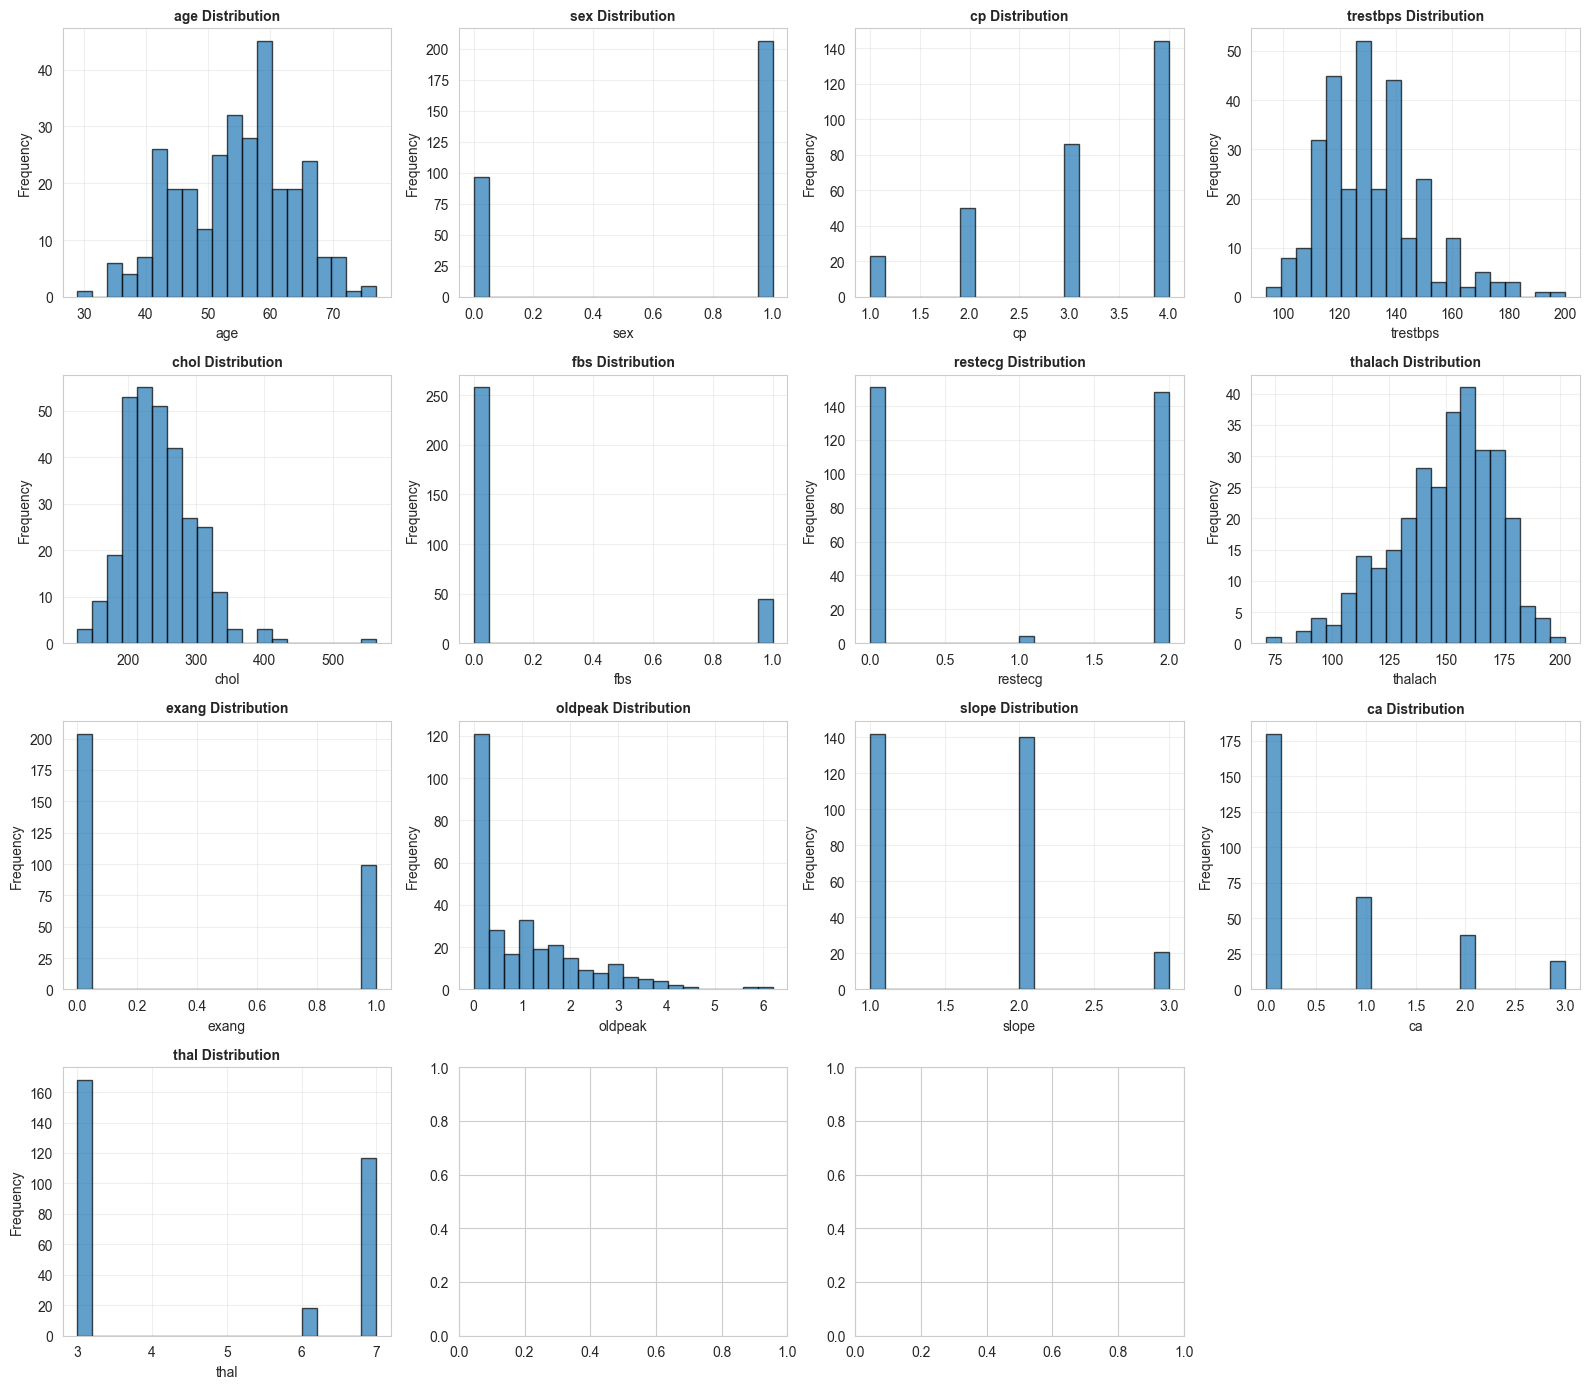

In [14]:
# EDA 1: Feature Distributions
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(heart_df.columns[:-1]):  # Exclude target
    axes[idx].hist(heart_df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('results/feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Feature distributions saved to 'results/feature_distributions.png'")
plt.show()

✓ Correlation matrix saved to 'results/correlation_matrix.png'


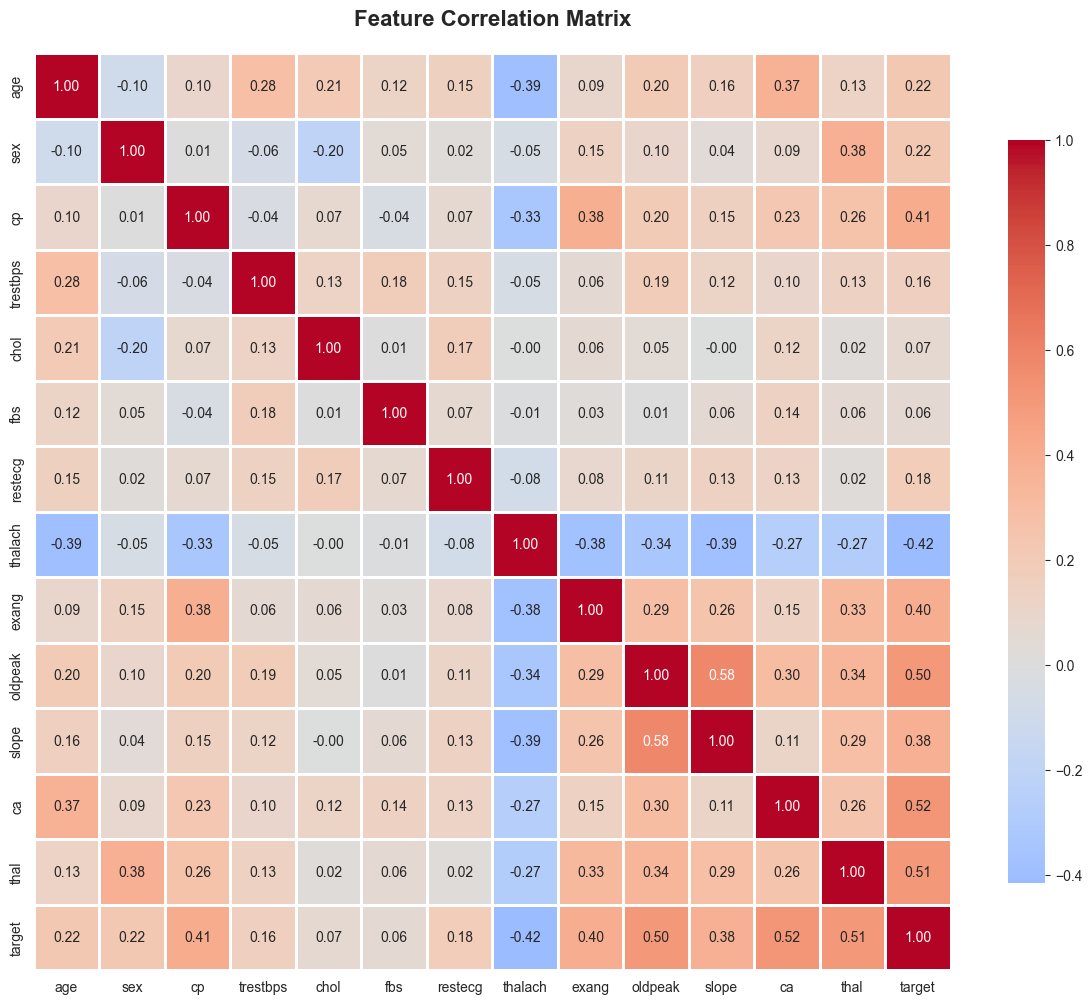


Strongest correlations with target:
ca         0.520968
thal       0.507155
oldpeak    0.504092
thalach    0.415040
cp         0.407075
Name: target, dtype: float64


In [15]:
# EDA 2: Correlation Matrix
plt.figure(figsize=(12, 10))

# Calculate correlation matrix
correlation_matrix = heart_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('results/correlation_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Correlation matrix saved to 'results/correlation_matrix.png'")
plt.show()

# Print strong correlations with target
print("\nStrongest correlations with target:")
print("=" * 50)
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print(target_corr[1:6])  # Top 5 excluding target itself

✓ Target distribution saved to 'results/target_distribution.png'


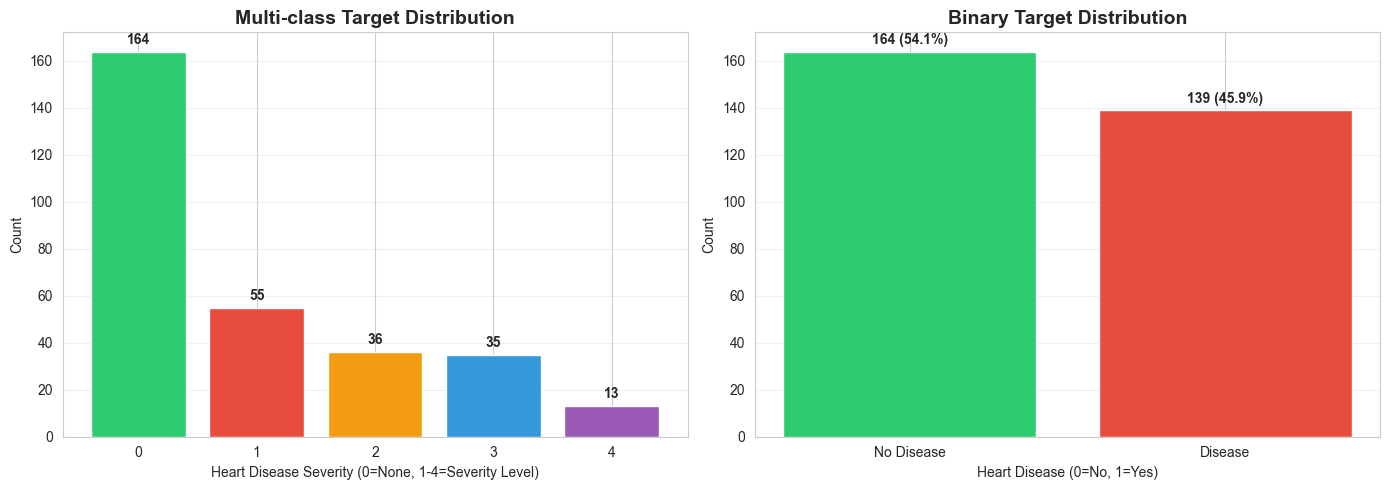


Class Balance Summary:
No Disease (0): 164 (54.13%)
Disease (1):    139 (45.87%)
Balance Ratio: 1.18:1


In [16]:
# EDA 3: Target Distribution (Multi-class and Binary)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Multi-class distribution
axes[0].bar(y.value_counts().index, y.value_counts().values, 
            color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db', '#9b59b6'])
axes[0].set_title('Multi-class Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease Severity (0=None, 1-4=Severity Level)')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(y.value_counts().sort_index().values):
    axes[0].text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Binary distribution
colors_binary = ['#2ecc71', '#e74c3c']
axes[1].bar(y_binary.value_counts().index, y_binary.value_counts().values, 
            color=colors_binary)
axes[1].set_title('Binary Target Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Disease', 'Disease'])
axes[1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(y_binary.value_counts().sort_index().values):
    axes[1].text(i, v + 2, f'{v} ({v/len(y_binary)*100:.1f}%)', 
                 ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('results/target_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Target distribution saved to 'results/target_distribution.png'")
plt.show()

print("\nClass Balance Summary:")
print("=" * 50)
print(f"No Disease (0): {(y_binary==0).sum()} ({(y_binary==0).sum()/len(y_binary)*100:.2f}%)")
print(f"Disease (1):    {(y_binary==1).sum()} ({(y_binary==1).sum()/len(y_binary)*100:.2f}%)")
print(f"Balance Ratio: {(y_binary==0).sum()/(y_binary==1).sum():.2f}:1")

### B2. Preprocessing ECG Signal Data

In [17]:
# B2: ECG Signal Preprocessing

from scipy.signal import butter, filtfilt, resample

def bandpass_filter(signal, lowcut=0.5, highcut=40, fs=360, order=4):
    """Apply bandpass filter to ECG signal"""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

def segment_ecg(signal, segment_length_sec=5, fs=360, overlap=0.5):
    """Segment ECG signal into fixed-length windows with overlap"""
    segment_samples = int(segment_length_sec * fs)
    step_samples = int(segment_samples * (1 - overlap))
    segments = []
    
    for start in range(0, len(signal) - segment_samples + 1, step_samples):
        segment = signal[start:start + segment_samples]
        segments.append(segment)
    
    return np.array(segments)

print("ECG Preprocessing Functions Defined")
print("=" * 50)
print("Bandpass Filter: 0.5-40 Hz")
print("Segment Length: 5 seconds")
print("Overlap: 50%")
print("Sampling Rate: 360 Hz")

ECG Preprocessing Functions Defined
Bandpass Filter: 0.5-40 Hz
Segment Length: 5 seconds
Overlap: 50%
Sampling Rate: 360 Hz


In [18]:
# Process all ECG records
ecg_records = ['100', '101', '102', '103', '104']
all_segments = []
all_labels = []

print("Processing ECG Records...")
print("=" * 50)

for record_num in ecg_records:
    # Load record
    record = wfdb.rdrecord(f'datasets/mit-bih/{record_num}')
    annotation = wfdb.rdann(f'datasets/mit-bih/{record_num}', 'atr')
    
    # Use first lead
    signal = record.p_signal[:, 0]
    
    # Apply bandpass filter
    filtered_signal = bandpass_filter(signal, fs=record.fs)
    
    # Segment the signal
    segments = segment_ecg(filtered_signal, segment_length_sec=5, fs=record.fs)
    
    # For simplicity, label all segments from this record with dominant beat type
    # N = Normal, anything else = Abnormal
    normal_beats = sum(1 for s in annotation.symbol if s == 'N')
    total_beats = len(annotation.symbol)
    label = 0 if normal_beats / total_beats > 0.8 else 1  # 0=Normal, 1=Abnormal
    
    all_segments.extend(segments)
    all_labels.extend([label] * len(segments))
    
    print(f"Record {record_num}: {len(segments)} segments, Label: {'Normal' if label==0 else 'Abnormal'}")
    print(f"  Normal beats: {normal_beats}/{total_beats} ({normal_beats/total_beats*100:.1f}%)")

# Convert to numpy arrays
ecg_segments_array = np.array(all_segments)
ecg_labels_array = np.array(all_labels)

print(f"\n✓ Total segments: {len(ecg_segments_array)}")
print(f"  Segment shape: {ecg_segments_array[0].shape}")
print(f"  Total shape: {ecg_segments_array.shape}")
print(f"  Labels shape: {ecg_labels_array.shape}")
print(f"  Label distribution: Normal={np.sum(ecg_labels_array==0)}, Abnormal={np.sum(ecg_labels_array==1)}")

Processing ECG Records...
Record 100: 721 segments, Label: Normal
  Normal beats: 2239/2274 (98.5%)
Record 101: 721 segments, Label: Normal
  Normal beats: 1860/1874 (99.3%)
Record 102: 721 segments, Label: Abnormal
  Normal beats: 99/2192 (4.5%)
Record 101: 721 segments, Label: Normal
  Normal beats: 1860/1874 (99.3%)
Record 102: 721 segments, Label: Abnormal
  Normal beats: 99/2192 (4.5%)
Record 103: 721 segments, Label: Normal
  Normal beats: 2082/2091 (99.6%)
Record 104: 721 segments, Label: Abnormal
  Normal beats: 163/2311 (7.1%)

✓ Total segments: 3605
  Segment shape: (1800,)
  Total shape: (3605, 1800)
  Labels shape: (3605,)
  Label distribution: Normal=2163, Abnormal=1442
Record 103: 721 segments, Label: Normal
  Normal beats: 2082/2091 (99.6%)
Record 104: 721 segments, Label: Abnormal
  Normal beats: 163/2311 (7.1%)

✓ Total segments: 3605
  Segment shape: (1800,)
  Total shape: (3605, 1800)
  Labels shape: (3605,)
  Label distribution: Normal=2163, Abnormal=1442


In [19]:
# Save ECG segments
np.save('results/ecg_segments.npy', ecg_segments_array)
np.save('results/ecg_labels.npy', ecg_labels_array)

print("✓ ECG segments saved to 'results/ecg_segments.npy'")
print("✓ ECG labels saved to 'results/ecg_labels.npy'")
print(f"  File size: ~{ecg_segments_array.nbytes / 1024 / 1024:.2f} MB")

✓ ECG segments saved to 'results/ecg_segments.npy'
✓ ECG labels saved to 'results/ecg_labels.npy'
  File size: ~49.51 MB


### B2.5. ECG Visualization - Sample Segments and Spectrograms

✓ ECG sample segments saved to 'results/ecg_sample_segments.png'


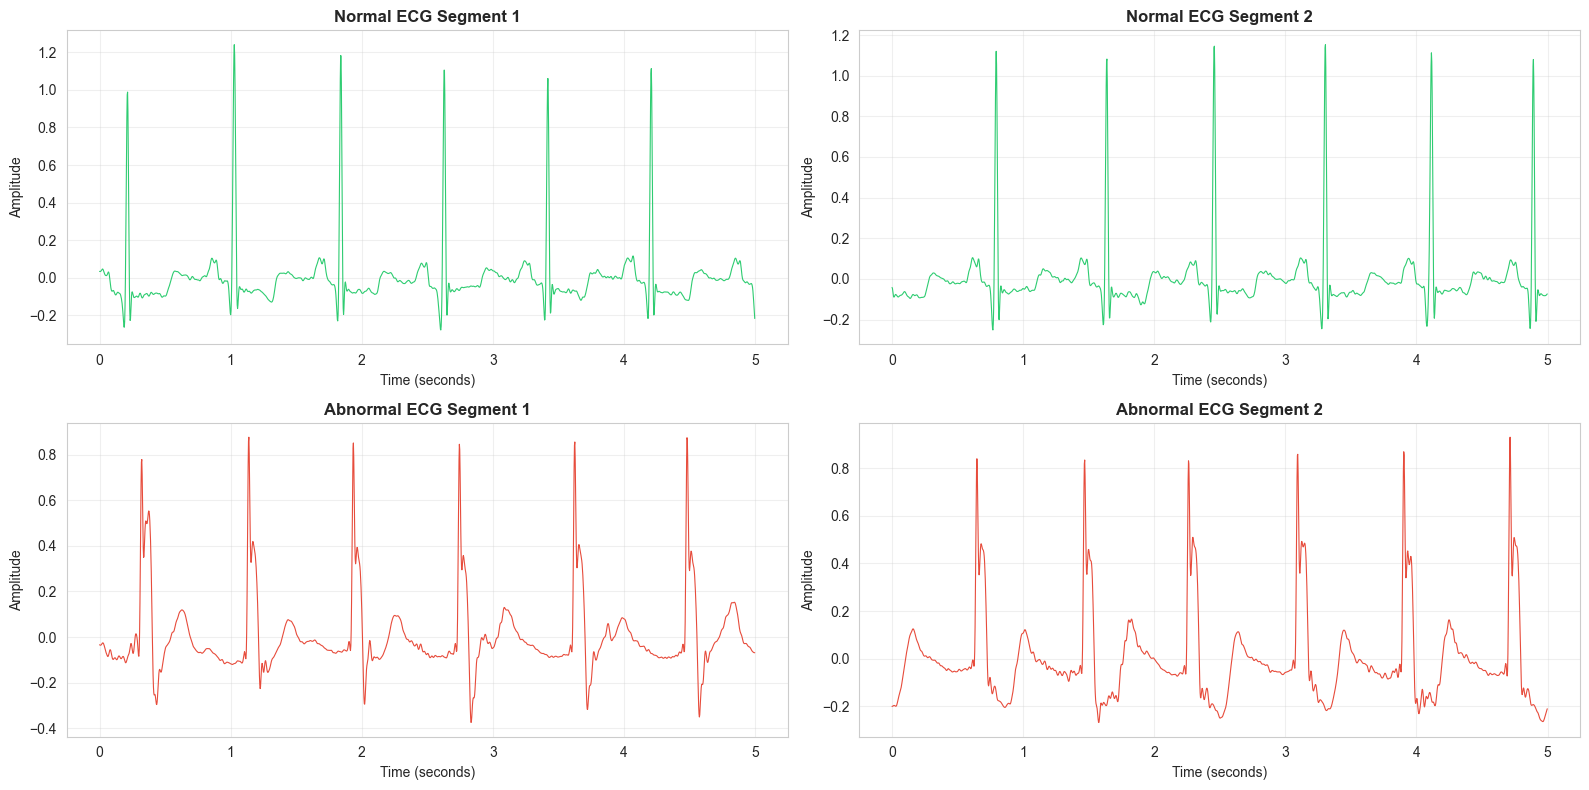

In [20]:
# Visualize sample ECG segments (Normal vs Abnormal)
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Find indices for normal and abnormal segments
normal_idx = np.where(ecg_labels_array == 0)[0]
abnormal_idx = np.where(ecg_labels_array == 1)[0]

# Plot 2 normal examples
for i in range(2):
    idx = normal_idx[i * 100]  # Sample every 100th
    time_axis = np.arange(len(ecg_segments_array[idx])) / 360  # Convert to seconds
    axes[0, i].plot(time_axis, ecg_segments_array[idx], linewidth=0.8, color='#2ecc71')
    axes[0, i].set_title(f'Normal ECG Segment {i+1}', fontsize=12, fontweight='bold')
    axes[0, i].set_xlabel('Time (seconds)')
    axes[0, i].set_ylabel('Amplitude')
    axes[0, i].grid(True, alpha=0.3)

# Plot 2 abnormal examples
for i in range(2):
    idx = abnormal_idx[i * 100]  # Sample every 100th
    time_axis = np.arange(len(ecg_segments_array[idx])) / 360
    axes[1, i].plot(time_axis, ecg_segments_array[idx], linewidth=0.8, color='#e74c3c')
    axes[1, i].set_title(f'Abnormal ECG Segment {i+1}', fontsize=12, fontweight='bold')
    axes[1, i].set_xlabel('Time (seconds)')
    axes[1, i].set_ylabel('Amplitude')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/ecg_sample_segments.png', dpi=300, bbox_inches='tight')
print("✓ ECG sample segments saved to 'results/ecg_sample_segments.png'")
plt.show()

✓ ECG spectrograms saved to 'results/ecg_spectrograms.png'


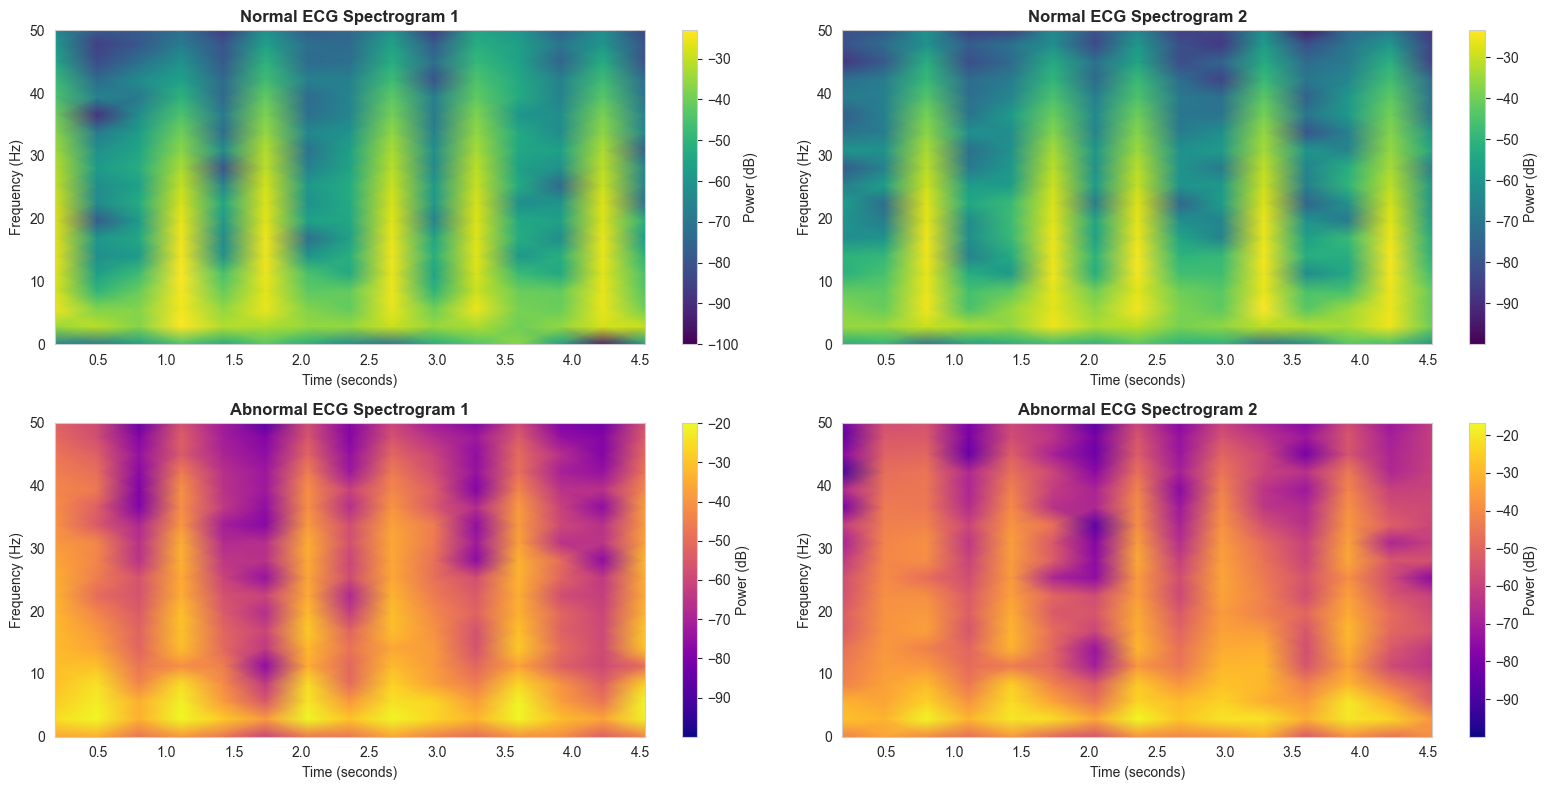

In [22]:
# Create spectrograms for sample segments
import scipy.signal

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Normal spectrograms
for i in range(2):
    idx = normal_idx[i * 100]
    # Compute spectrogram
    f, t, Sxx = scipy.signal.spectrogram(ecg_segments_array[idx], fs=360, nperseg=128)
    
    im = axes[0, i].pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
    axes[0, i].set_title(f'Normal ECG Spectrogram {i+1}', fontsize=12, fontweight='bold')
    axes[0, i].set_ylabel('Frequency (Hz)')
    axes[0, i].set_xlabel('Time (seconds)')
    axes[0, i].set_ylim([0, 50])  # Focus on relevant frequencies
    plt.colorbar(im, ax=axes[0, i], label='Power (dB)')

# Abnormal spectrograms
for i in range(2):
    idx = abnormal_idx[i * 100]
    # Compute spectrogram
    f, t, Sxx = scipy.signal.spectrogram(ecg_segments_array[idx], fs=360, nperseg=128)
    
    im = axes[1, i].pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='plasma')
    axes[1, i].set_title(f'Abnormal ECG Spectrogram {i+1}', fontsize=12, fontweight='bold')
    axes[1, i].set_ylabel('Frequency (Hz)')
    axes[1, i].set_xlabel('Time (seconds)')
    axes[1, i].set_ylim([0, 50])
    plt.colorbar(im, ax=axes[1, i], label='Power (dB)')

plt.tight_layout()
plt.savefig('results/ecg_spectrograms.png', dpi=300, bbox_inches='tight')
print("✓ ECG spectrograms saved to 'results/ecg_spectrograms.png'")
plt.show()

## Day 3: Baseline Machine Learning Models

Train and evaluate traditional ML models on tabular clinical data with 5-fold cross-validation.

In [3]:
# Load the cleaned data and split into train/test sets
print("=" * 50)
print("LOADING CLEANED DATA FOR BASELINE MODELS")
print("=" * 50)

# Load cleaned data
df_ml = pd.read_csv('results/cleaned_data.csv')
print(f"\n✓ Loaded cleaned data: {df_ml.shape}")

# Separate features and target
X_ml = df_ml.drop('target', axis=1)
y_ml = df_ml['target']

print(f"✓ Features shape: {X_ml.shape}")
print(f"✓ Target shape: {y_ml.shape}")
print(f"✓ Target distribution: {y_ml.value_counts().to_dict()}")

# Split into train and test sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_ml, y_ml, test_size=0.2, random_state=42, stratify=y_ml
)

print(f"\n✓ Train set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"✓ Train distribution: {y_train.value_counts().to_dict()}")
print(f"✓ Test distribution: {y_test.value_counts().to_dict()}")
print("\nData ready for model training!")

LOADING CLEANED DATA FOR BASELINE MODELS

✓ Loaded cleaned data: (303, 14)
✓ Features shape: (303, 13)
✓ Target shape: (303,)
✓ Target distribution: {0: 164, 1: 139}

✓ Train set: 242 samples
✓ Test set: 61 samples
✓ Train distribution: {0: 131, 1: 111}
✓ Test distribution: {0: 33, 1: 28}

Data ready for model training!


In [4]:
# Import required libraries for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✓ All ML libraries imported successfully!")

✓ All ML libraries imported successfully!


In [5]:
# Define all baseline models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("=" * 60)
print("TRAINING BASELINE MODELS WITH 5-FOLD CROSS-VALIDATION")
print("=" * 60)

# Dictionary to store results
results = {}
trained_models = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{'=' * 60}")
    print(f"Training: {model_name}")
    print(f"{'=' * 60}")
    
    # Perform 5-fold cross-validation on training set
    cv_scores = cross_validate(
        model, X_train, y_train, cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        return_train_score=False
    )
    
    # Train on full training set
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate test metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[model_name] = {
        'cv_accuracy_mean': cv_scores['test_accuracy'].mean(),
        'cv_accuracy_std': cv_scores['test_accuracy'].std(),
        'cv_precision_mean': cv_scores['test_precision'].mean(),
        'cv_precision_std': cv_scores['test_precision'].std(),
        'cv_recall_mean': cv_scores['test_recall'].mean(),
        'cv_recall_std': cv_scores['test_recall'].std(),
        'cv_f1_mean': cv_scores['test_f1'].mean(),
        'cv_f1_std': cv_scores['test_f1'].std(),
        'cv_auc_mean': cv_scores['test_roc_auc'].mean(),
        'cv_auc_std': cv_scores['test_roc_auc'].std(),
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'test_auc': test_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    # Print results
    print(f"\n5-Fold Cross-Validation (Train Set):")
    print(f"  Accuracy:  {cv_scores['test_accuracy'].mean():.4f} (+/- {cv_scores['test_accuracy'].std():.4f})")
    print(f"  Precision: {cv_scores['test_precision'].mean():.4f} (+/- {cv_scores['test_precision'].std():.4f})")
    print(f"  Recall:    {cv_scores['test_recall'].mean():.4f} (+/- {cv_scores['test_recall'].std():.4f})")
    print(f"  F1-Score:  {cv_scores['test_f1'].mean():.4f} (+/- {cv_scores['test_f1'].std():.4f})")
    print(f"  ROC-AUC:   {cv_scores['test_roc_auc'].mean():.4f} (+/- {cv_scores['test_roc_auc'].std():.4f})")
    
    print(f"\nTest Set Performance:")
    print(f"  Accuracy:  {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall:    {test_recall:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}")
    print(f"  ROC-AUC:   {test_auc:.4f}")

print(f"\n{'=' * 60}")
print("ALL MODELS TRAINED SUCCESSFULLY!")
print(f"{'=' * 60}")

TRAINING BASELINE MODELS WITH 5-FOLD CROSS-VALIDATION

Training: Logistic Regression

5-Fold Cross-Validation (Train Set):
  Accuracy:  0.8263 (+/- 0.0534)
  Precision: 0.8375 (+/- 0.0839)
  Recall:    0.7743 (+/- 0.0588)
  F1-Score:  0.8034 (+/- 0.0622)
  ROC-AUC:   0.8890 (+/- 0.0436)

Test Set Performance:
  Accuracy:  0.8689
  Precision: 0.8125
  Recall:    0.9286
  F1-Score:  0.8667
  ROC-AUC:   0.9513

Training: Random Forest

5-Fold Cross-Validation (Train Set):
  Accuracy:  0.8055 (+/- 0.0415)
  Precision: 0.8224 (+/- 0.0590)
  Recall:    0.7379 (+/- 0.0688)
  F1-Score:  0.7756 (+/- 0.0515)
  ROC-AUC:   0.8846 (+/- 0.0404)

Test Set Performance:
  Accuracy:  0.9016
  Precision: 0.8438
  Recall:    0.9643
  F1-Score:  0.9000
  ROC-AUC:   0.9513

Training: XGBoost

5-Fold Cross-Validation (Train Set):
  Accuracy:  0.8055 (+/- 0.0415)
  Precision: 0.8224 (+/- 0.0590)
  Recall:    0.7379 (+/- 0.0688)
  F1-Score:  0.7756 (+/- 0.0515)
  ROC-AUC:   0.8846 (+/- 0.0404)

Test Set Perfor

In [6]:
# Create comparison table
print("\n" + "=" * 80)
print("MODEL COMPARISON - TEST SET PERFORMANCE")
print("=" * 80)

comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': f"{metrics['test_accuracy']:.4f}",
        'Precision': f"{metrics['test_precision']:.4f}",
        'Recall': f"{metrics['test_recall']:.4f}",
        'F1-Score': f"{metrics['test_f1']:.4f}",
        'ROC-AUC': f"{metrics['test_auc']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))

# Identify best model for each metric
print("\n" + "=" * 80)
print("BEST PERFORMING MODELS BY METRIC")
print("=" * 80)

best_accuracy = max(results.items(), key=lambda x: x[1]['test_accuracy'])
best_precision = max(results.items(), key=lambda x: x[1]['test_precision'])
best_recall = max(results.items(), key=lambda x: x[1]['test_recall'])
best_f1 = max(results.items(), key=lambda x: x[1]['test_f1'])
best_auc = max(results.items(), key=lambda x: x[1]['test_auc'])

print(f"\nBest Accuracy:  {best_accuracy[0]} ({best_accuracy[1]['test_accuracy']:.4f})")
print(f"Best Precision: {best_precision[0]} ({best_precision[1]['test_precision']:.4f})")
print(f"Best Recall:    {best_recall[0]} ({best_recall[1]['test_recall']:.4f})")
print(f"Best F1-Score:  {best_f1[0]} ({best_f1[1]['test_f1']:.4f})")
print(f"Best ROC-AUC:   {best_auc[0]} ({best_auc[1]['test_auc']:.4f})")

# Overall best model (based on F1-score)
print(f"\n🏆 Overall Best Model: {best_f1[0]} (F1-Score: {best_f1[1]['test_f1']:.4f})")
print("=" * 80)


MODEL COMPARISON - TEST SET PERFORMANCE

               Model Accuracy Precision Recall F1-Score ROC-AUC
Logistic Regression   0.8689    0.8125 0.9286   0.8667  0.9513
      Random Forest   0.9016    0.8438 0.9643   0.9000  0.9513
            XGBoost   0.8525    0.7879 0.9286   0.8525  0.9188
                SVM   0.8689    0.8333 0.8929   0.8621  0.9437
                KNN   0.8689    0.7941 0.9643   0.8710  0.9275

BEST PERFORMING MODELS BY METRIC

Best Accuracy:  Random Forest (0.9016)
Best Precision: Random Forest (0.8438)
Best Recall:    Random Forest (0.9643)
Best F1-Score:  Random Forest (0.9000)
Best ROC-AUC:   Logistic Regression (0.9513)

🏆 Overall Best Model: Random Forest (F1-Score: 0.9000)


✓ Confusion matrices saved to 'results/confusion_matrices.png'


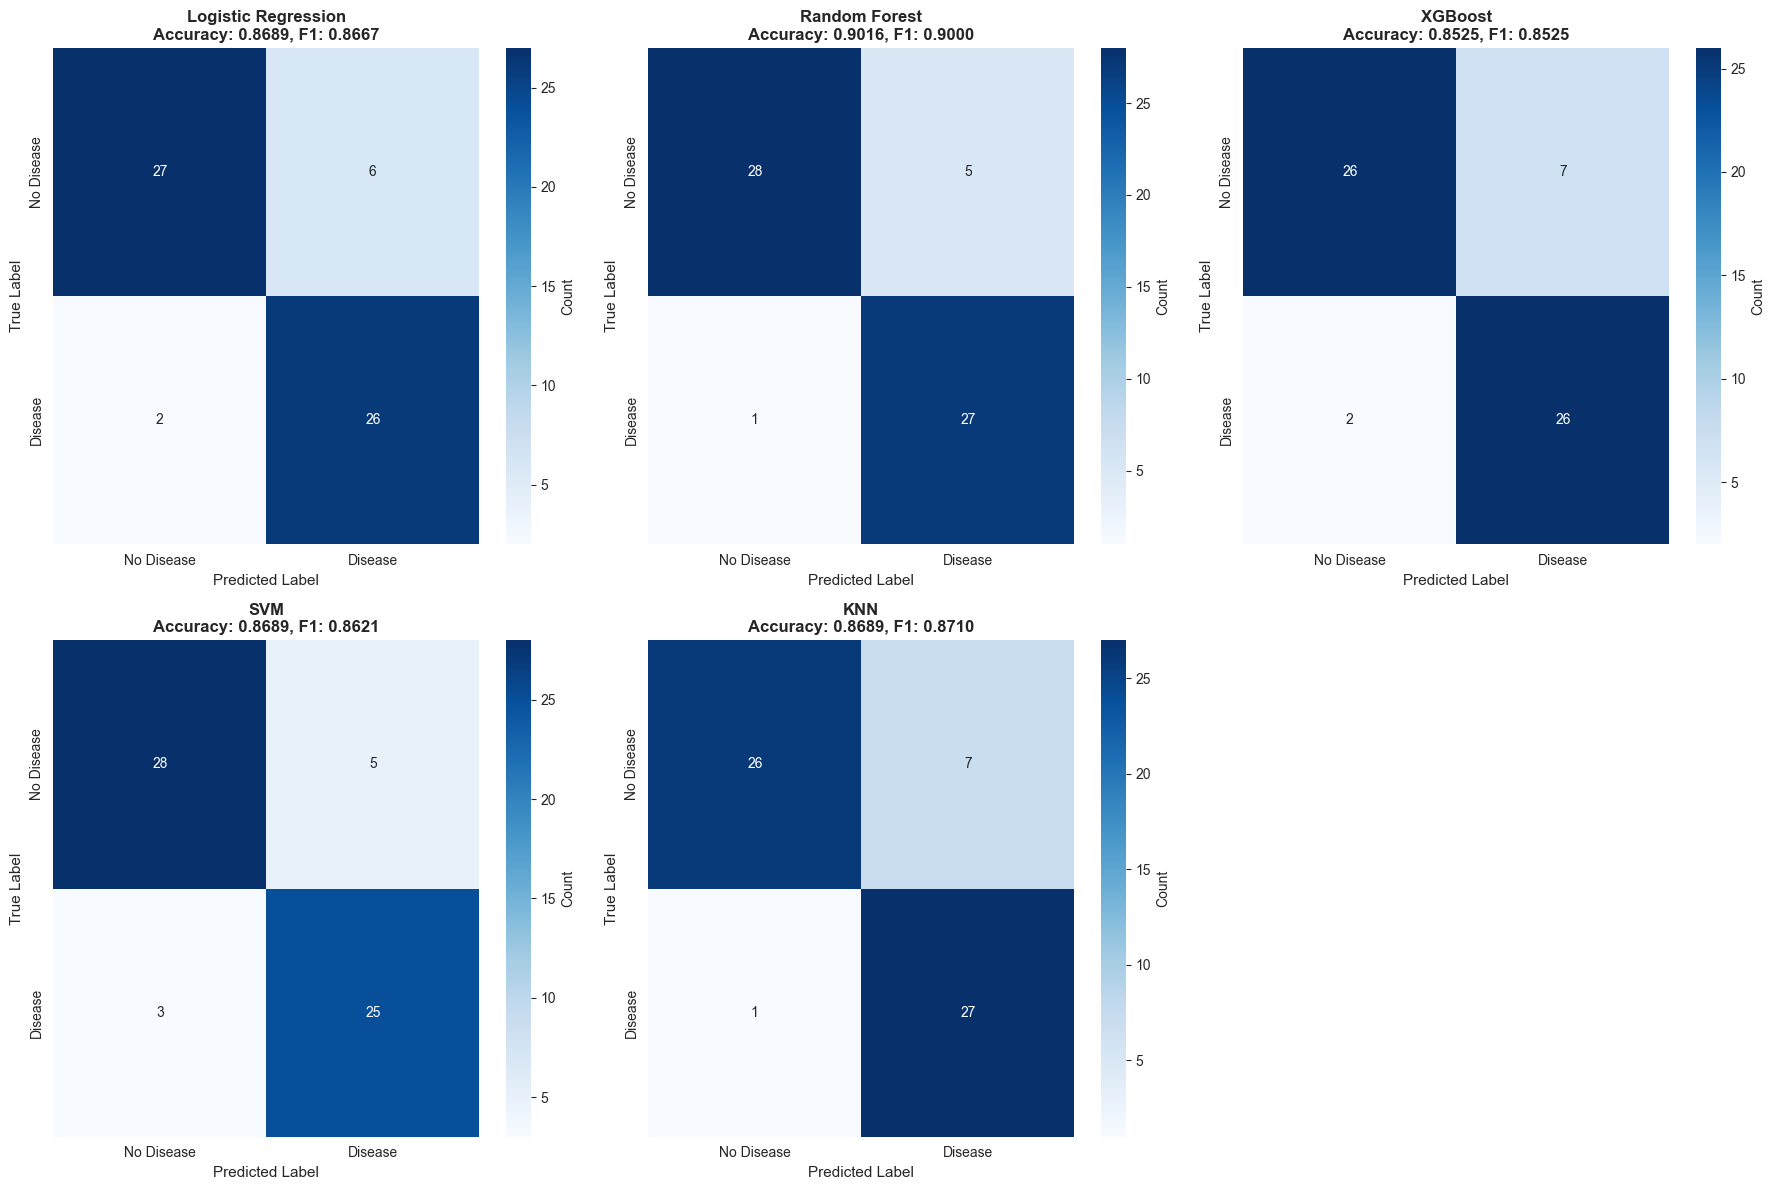

In [7]:
# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = confusion_matrix(y_test, metrics['predictions'])
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Count'},
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    axes[idx].set_title(f'{model_name}\nAccuracy: {metrics["test_accuracy"]:.4f}, F1: {metrics["test_f1"]:.4f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.savefig('results/confusion_matrices.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrices saved to 'results/confusion_matrices.png'")
plt.show()

In [8]:
# Save trained models
import os
os.makedirs('models', exist_ok=True)

print("=" * 60)
print("SAVING TRAINED MODELS")
print("=" * 60)

for model_name, model in trained_models.items():
    filename = f"models/{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f"✓ Saved: {filename}")

print("\n✓ All models saved successfully!")
print("=" * 60)

SAVING TRAINED MODELS
✓ Saved: models/logistic_regression.pkl
✓ Saved: models/random_forest.pkl
✓ Saved: models/xgboost.pkl
✓ Saved: models/svm.pkl
✓ Saved: models/knn.pkl

✓ All models saved successfully!


✓ ROC curves saved to 'results/roc_curves.png'


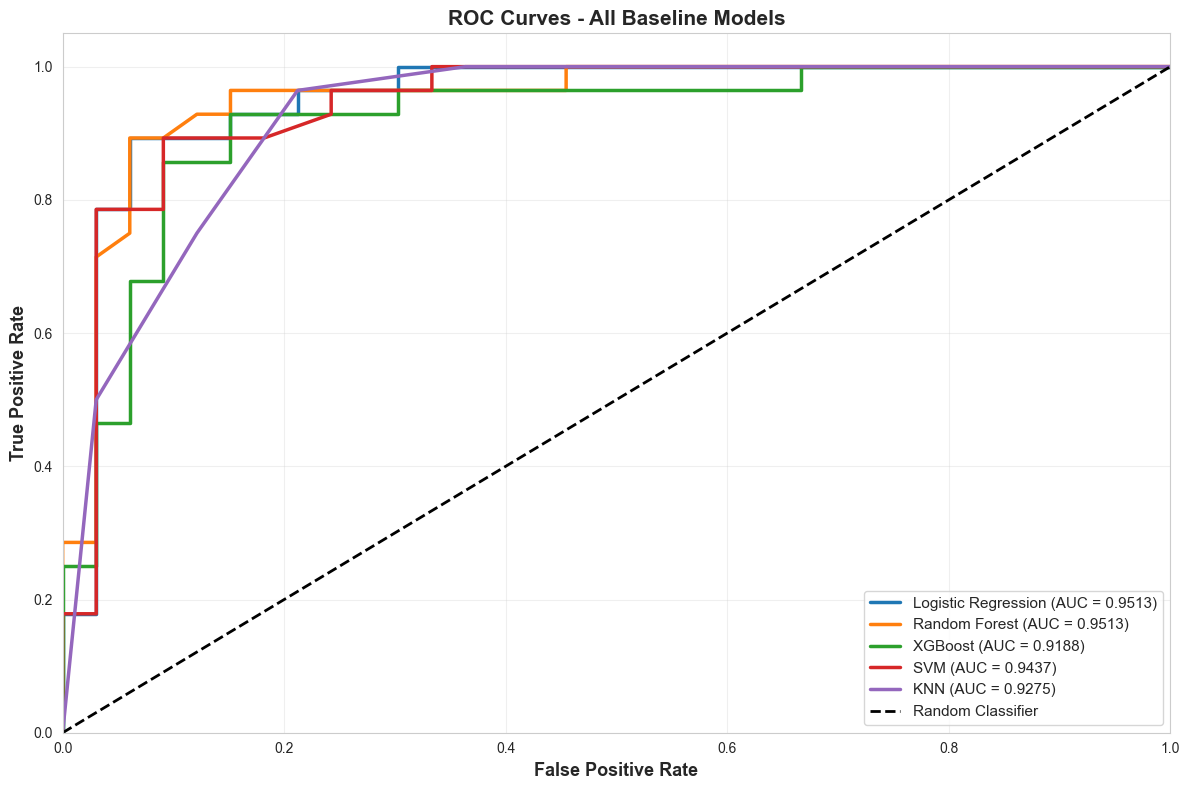

In [9]:
# Create ROC curves for all models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

for model_name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['probabilities'])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linewidth=2.5, 
             label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curves - All Baseline Models', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/roc_curves.png', dpi=300, bbox_inches='tight')
print("✓ ROC curves saved to 'results/roc_curves.png'")
plt.show()

### Optional: Simple Deep Learning Prototype (1D-CNN)

Quick experiment with ECG signal classification using a tiny 1D-CNN.

In [10]:
# Load ECG segments and prepare for CNN
print("=" * 60)
print("PREPARING ECG DATA FOR 1D-CNN")
print("=" * 60)

ecg_segments = np.load('results/ecg_segments.npy')
ecg_labels = np.load('results/ecg_labels.npy')

print(f"\n✓ ECG segments shape: {ecg_segments.shape}")
print(f"✓ ECG labels shape: {ecg_labels.shape}")
print(f"✓ Label distribution: {np.bincount(ecg_labels)}")

# Use a small subset for quick prototyping (10% of data)
subset_size = int(0.1 * len(ecg_segments))
indices = np.random.RandomState(42).choice(len(ecg_segments), subset_size, replace=False)

X_ecg_subset = ecg_segments[indices]
y_ecg_subset = ecg_labels[indices]

print(f"\n✓ Using subset: {X_ecg_subset.shape[0]} samples (10% for quick prototyping)")

# Split into train/test
from sklearn.model_selection import train_test_split
X_ecg_train, X_ecg_test, y_ecg_train, y_ecg_test = train_test_split(
    X_ecg_subset, y_ecg_subset, test_size=0.2, random_state=42, stratify=y_ecg_subset
)

# Reshape for CNN (samples, timesteps, features)
X_ecg_train = X_ecg_train.reshape(-1, 1800, 1)
X_ecg_test = X_ecg_test.reshape(-1, 1800, 1)

print(f"✓ Train set: {X_ecg_train.shape}")
print(f"✓ Test set: {X_ecg_test.shape}")
print("✓ Data ready for CNN training!")

PREPARING ECG DATA FOR 1D-CNN

✓ ECG segments shape: (3605, 1800)
✓ ECG labels shape: (3605,)
✓ Label distribution: [2163 1442]

✓ Using subset: 360 samples (10% for quick prototyping)
✓ Train set: (288, 1800, 1)
✓ Test set: (72, 1800, 1)
✓ Data ready for CNN training!


In [11]:
# Build a tiny 1D-CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("=" * 60)
print("BUILDING TINY 1D-CNN MODEL")
print("=" * 60)

# Create simple CNN architecture
cnn_model = keras.Sequential([
    # First convolutional block
    layers.Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=(1800, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    
    # Second convolutional block
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    
    # Third convolutional block
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'AUC']
)

print("\n✓ Model architecture:")
cnn_model.summary()
print("\n✓ Model compiled successfully!")

BUILDING TINY 1D-CNN MODEL

✓ Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1794, 32)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 897, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 897, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 893, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 446, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 446, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 444, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 222, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 222, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,818,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,854,017 (7.07 MB)

 Trainable params: 1,854,017 (7.07 MB)

 Non-trainable params: 0 (0.00 B)


✓ Model compiled successfully!


In [12]:
# Train the CNN (small batch size, few epochs as requested)
print("=" * 60)
print("TRAINING 1D-CNN MODEL")
print("=" * 60)
print("Note: Using small batch size and few epochs for quick prototyping\n")

history = cnn_model.fit(
    X_ecg_train, y_ecg_train,
    batch_size=16,  # Small batch size
    epochs=10,      # Few epochs
    validation_split=0.2,
    verbose=1
)

print("\n✓ Training completed!")

# Evaluate on test set
print("\n" + "=" * 60)
print("EVALUATING CNN ON TEST SET")
print("=" * 60)

test_loss, test_acc, test_prec, test_rec, test_auc = cnn_model.evaluate(X_ecg_test, y_ecg_test, verbose=0)
y_ecg_pred = (cnn_model.predict(X_ecg_test, verbose=0) > 0.5).astype(int).flatten()
test_f1_cnn = f1_score(y_ecg_test, y_ecg_pred)

print(f"\nTest Set Performance:")
print(f"  Loss:      {test_loss:.4f}")
print(f"  Accuracy:  {test_acc:.4f}")
print(f"  Precision: {test_prec:.4f}")
print(f"  Recall:    {test_rec:.4f}")
print(f"  F1-Score:  {test_f1_cnn:.4f}")
print(f"  ROC-AUC:   {test_auc:.4f}")

print("\n✓ CNN prototype complete! (This is just a quick baseline)")
print("=" * 60)

TRAINING 1D-CNN MODEL
Note: Using small batch size and few epochs for quick prototyping

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - AUC: 0.5056 - accuracy: 0.5957 - loss: 0.6923 - precision: 0.4348 - recall: 0.1111 - val_AUC: 0.6178 - val_accuracy: 0.7759 - val_loss: 0.6497 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.7275 - accuracy: 0.6522 - loss: 0.6125 - precision: 0.8125 - recall: 0.1444 - val_AUC: 0.6721 - val_accuracy: 0.7241 - val_loss: 0.5398 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.8496 - accuracy: 0.6739 - loss: 0.5383 - precision: 0.9412 - recall: 0.1778 - val_AUC: 0.7609 - val_accuracy: 0.7241 - val_loss: 0.5552 - val_precision: 0.2500 - val_recall: 0.1667
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.9279 - accuracy: 0.7565 - loss: 0.4646 - precision: 0.9474 - recall: 0.4000 - val_AUC: 0.7853 - val_accuracy: 0

In [13]:
# Save the CNN model
cnn_model.save('models/cnn_ecg_baseline.keras')
print("✓ CNN model saved to 'models/cnn_ecg_baseline.keras'")

✓ CNN model saved to 'models/cnn_ecg_baseline.keras'


## Day 4: Transfer Learning & Main Model Development

Using transfer learning with EfficientNetB0 on ECG spectrograms for improved performance.

In [15]:
# Generate spectrogram images from ECG segments for transfer learning
import os
import shutil
from PIL import Image
import scipy.signal

print("=" * 70)
print("GENERATING SPECTROGRAM IMAGES FOR TRANSFER LEARNING")
print("=" * 70)

# Create directory structure
base_dir = 'data/spectrograms'
for split in ['train', 'val', 'test']:
    for class_name in ['normal', 'abnormal']:
        os.makedirs(f'{base_dir}/{split}/{class_name}', exist_ok=True)

print(f"\n✓ Created directory structure at '{base_dir}/'")

# Load ECG segments
ecg_segments = np.load('results/ecg_segments.npy')
ecg_labels = np.load('results/ecg_labels.npy')

print(f"✓ Loaded {len(ecg_segments)} ECG segments")

# Split data: 70% train, 15% val, 15% test
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp
X_train_spec, X_temp, y_train_spec, y_temp = train_test_split(
    ecg_segments, ecg_labels, test_size=0.3, random_state=42, stratify=ecg_labels
)

# Second split: 50% of temp = 15% val, 15% test
X_val_spec, X_test_spec, y_val_spec, y_test_spec = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\n✓ Data split:")
print(f"  Train: {len(X_train_spec)} segments ({np.bincount(y_train_spec)})")
print(f"  Val:   {len(X_val_spec)} segments ({np.bincount(y_val_spec)})")
print(f"  Test:  {len(X_test_spec)} segments ({np.bincount(y_test_spec)})")

print(f"\n⏳ Generating spectrograms... (this may take a few minutes)")

# Function to generate and save spectrogram
def save_spectrogram(signal, filepath, img_size=(224, 224)):
    """Generate spectrogram and save as PNG image"""
    # Generate spectrogram
    f, t, Sxx = scipy.signal.spectrogram(signal, fs=360, nperseg=128)
    
    # Create figure without axes for clean image
    fig = plt.figure(figsize=(img_size[0]/100, img_size[1]/100), dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    # Plot spectrogram
    ax.imshow(10 * np.log10(Sxx + 1e-10), aspect='auto', origin='lower', 
              cmap='viridis', extent=[t.min(), t.max(), f.min(), 50])
    
    # Save
    plt.savefig(filepath, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Generate spectrograms for each split (using subset for speed)
datasets = {
    'train': (X_train_spec[:500], y_train_spec[:500]),  # Use subset for speed
    'val': (X_val_spec[:100], y_val_spec[:100]),
    'test': (X_test_spec[:100], y_test_spec[:100])
}

for split_name, (X_split, y_split) in datasets.items():
    for idx, (signal, label) in enumerate(zip(X_split, y_split)):
        class_name = 'normal' if label == 0 else 'abnormal'
        filepath = f'{base_dir}/{split_name}/{class_name}/ecg_{idx:04d}.png'
        save_spectrogram(signal, filepath)
    
    print(f"✓ {split_name.capitalize()}: Generated {len(X_split)} spectrograms")

print(f"\n✓ All spectrograms saved to '{base_dir}/'")
print("=" * 70)

GENERATING SPECTROGRAM IMAGES FOR TRANSFER LEARNING

✓ Created directory structure at 'data/spectrograms/'
✓ Loaded 3605 ECG segments

✓ Data split:
  Train: 2523 segments ([1514 1009])
  Val:   541 segments ([324 217])
  Test:  541 segments ([325 216])

⏳ Generating spectrograms... (this may take a few minutes)
✓ Train: Generated 500 spectrograms
✓ Train: Generated 500 spectrograms
✓ Val: Generated 100 spectrograms
✓ Val: Generated 100 spectrograms
✓ Test: Generated 100 spectrograms

✓ All spectrograms saved to 'data/spectrograms/'
✓ Test: Generated 100 spectrograms

✓ All spectrograms saved to 'data/spectrograms/'


In [16]:
# Setup data generators with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("=" * 70)
print("BUILDING TRANSFER LEARNING MODEL")
print("=" * 70)

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 20

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# No augmentation for validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    'data/spectrograms/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    seed=42
)

val_generator = val_test_datagen.flow_from_directory(
    'data/spectrograms/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    'data/spectrograms/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print(f"\n✓ Data generators created:")
print(f"  Train: {train_generator.samples} images")
print(f"  Val:   {val_generator.samples} images")
print(f"  Test:  {test_generator.samples} images")
print(f"  Classes: {train_generator.class_indices}")

# Calculate class weights for imbalanced data
from sklearn.utils.class_weight import compute_class_weight
class_weights_array = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}
print(f"  Class weights: {class_weights}")

print("\n✓ Building EfficientNetB0 model with transfer learning...")

# Load pretrained EfficientNetB0 (without top layers)
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(*IMG_SIZE, 3)
)

# Freeze base model layers
base_model.trainable = False
print(f"✓ Base model loaded and frozen ({len(base_model.layers)} layers)")

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create final model
tl_model = Model(inputs=base_model.input, outputs=outputs)

# Compile model
tl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'AUC']
)

print(f"✓ Model compiled successfully")
print(f"  Total params: {tl_model.count_params():,}")
print(f"  Trainable params: {sum([tf.size(w).numpy() for w in tl_model.trainable_weights]):,}")
print(f"  Non-trainable params: {sum([tf.size(w).numpy() for w in tl_model.non_trainable_weights]):,}")
print("=" * 70)

BUILDING TRANSFER LEARNING MODEL
Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.

✓ Data generators created:
  Train: 500 images
  Val:   100 images
  Test:  100 images
  Classes: {'abnormal': 0, 'normal': 1}
  Class weights: {0: np.float64(1.2195121951219512), 1: np.float64(0.847457627118644)}

✓ Building EfficientNetB0 model with transfer learning...

✓ Data generators created:
  Train: 500 images
  Val:   100 images
  Test:  100 images
  Classes: {'abnormal': 0, 'normal': 1}
  Class weights: {0: np.float64(1.2195121951219512), 1: np.float64(0.847457627118644)}

✓ Building EfficientNetB0 model with transfer learning...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
✓ Base model loaded and frozen (238 layers)
✓ Model compiled successfully
  Total params: 4,410,532
  Trainable 

In [17]:
# Train the transfer learning model with callbacks
print("=" * 70)
print("TRAINING TRANSFER LEARNING MODEL")
print("=" * 70)

# Setup callbacks
os.makedirs('models/transfer_learning', exist_ok=True)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='models/transfer_learning/best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

print(f"\n✓ Callbacks configured:")
print(f"  - EarlyStopping (patience=5)")
print(f"  - ModelCheckpoint (save best)")
print(f"  - ReduceLROnPlateau (factor=0.5)")

print(f"\n⏳ Training model ({EPOCHS} epochs max, batch_size={BATCH_SIZE})...\n")

# Train model
history_tl = tl_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

print(f"\n✓ Training completed!")
print(f"  Total epochs: {len(history_tl.history['loss'])}")
print(f"  Best val_accuracy: {max(history_tl.history['val_accuracy']):.4f}")
print(f"  Best val_loss: {min(history_tl.history['val_loss']):.4f}")
print("=" * 70)

TRAINING TRANSFER LEARNING MODEL

✓ Callbacks configured:
  - EarlyStopping (patience=5)
  - ModelCheckpoint (save best)
  - ReduceLROnPlateau (factor=0.5)

⏳ Training model (20 epochs max, batch_size=16)...

Epoch 1/20
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - AUC: 0.4567 - accuracy: 0.5021 - loss: 0.7569 - precision: 0.5564 - recall: 0.4266
Epoch 1: val_accuracy improved from None to 0.63000, saving model to models/transfer_learning/best_model.keras

Epoch 1: val_accuracy improved from None to 0.63000, saving model to models/transfer_learning/best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 895ms/step - AUC: 0.4670 - accuracy: 0.4940 - loss: 0.7407 - precision: 0.5795 - recall: 0.5186 - val_AUC: 0.5000 - val_accuracy: 0.6300 - val_loss: 0.6654 - val_precision: 0.6300 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 895ms/step - AUC: 0.4670 - accuracy: 0.4940 - loss: 0.7407 - precision: 0.5795 - recall: 0.5186 - val_AUC: 0.5000 - val_ac

In [18]:
# Evaluate transfer learning model on test set
print("=" * 70)
print("EVALUATING TRANSFER LEARNING MODEL")
print("=" * 70)

# Load best model
best_tl_model = keras.models.load_model('models/transfer_learning/best_model.keras')
print("✓ Loaded best model from checkpoint")

# Evaluate on test set
test_loss, test_acc_tl, test_prec_tl, test_rec_tl, test_auc_tl = best_tl_model.evaluate(
    test_generator, verbose=0
)

print(f"\nTest Set Performance:")
print(f"  Loss:      {test_loss:.4f}")
print(f"  Accuracy:  {test_acc_tl:.4f}")
print(f"  Precision: {test_prec_tl:.4f}")
print(f"  Recall:    {test_rec_tl:.4f}")
print(f"  AUC:       {test_auc_tl:.4f}")

# Get predictions
test_generator.reset()
y_pred_proba_tl = best_tl_model.predict(test_generator, verbose=0)
y_pred_tl = (y_pred_proba_tl > 0.5).astype(int).flatten()
y_true_tl = test_generator.classes

# Calculate F1-score
from sklearn.metrics import f1_score, classification_report, confusion_matrix
f1_tl = f1_score(y_true_tl, y_pred_tl)
print(f"  F1-Score:  {f1_tl:.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_true_tl, y_pred_tl, 
                          target_names=['Abnormal', 'Normal']))

print("=" * 70)

EVALUATING TRANSFER LEARNING MODEL
✓ Loaded best model from checkpoint

Test Set Performance:
  Loss:      0.6833
  Accuracy:  0.5700
  Precision: 0.5700
  Recall:    1.0000
  AUC:       0.5000
  F1-Score:  0.7261

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00        43
      Normal       0.57      1.00      0.73        57

    accuracy                           0.57       100
   macro avg       0.28      0.50      0.36       100
weighted avg       0.32      0.57      0.41       100



✓ Evaluation plots saved to 'results/transfer_learning_evaluation.png'


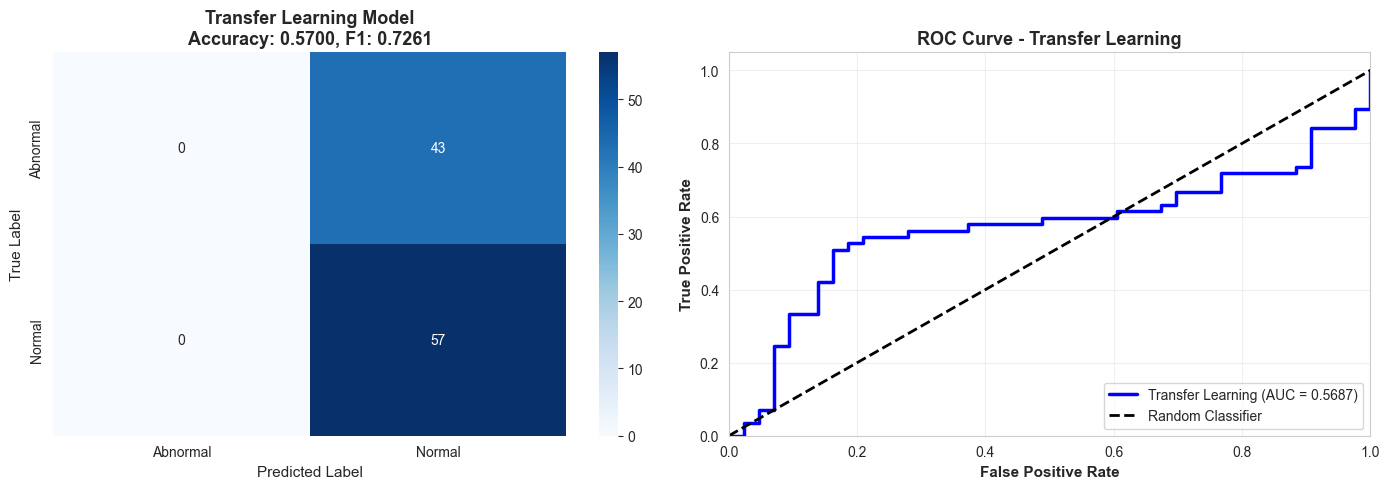

In [19]:
# Create confusion matrix and ROC curve for transfer learning model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_tl = confusion_matrix(y_true_tl, y_pred_tl)
sns.heatmap(cm_tl, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Abnormal', 'Normal'],
            yticklabels=['Abnormal', 'Normal'])
axes[0].set_title(f'Transfer Learning Model\nAccuracy: {test_acc_tl:.4f}, F1: {f1_tl:.4f}',
                 fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr_tl, tpr_tl, _ = roc_curve(y_true_tl, y_pred_proba_tl)
roc_auc_tl = auc(fpr_tl, tpr_tl)

axes[1].plot(fpr_tl, tpr_tl, 'b-', linewidth=2.5, label=f'Transfer Learning (AUC = {roc_auc_tl:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
axes[1].set_title('ROC Curve - Transfer Learning', fontsize=13, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/transfer_learning_evaluation.png', dpi=300, bbox_inches='tight')
print("✓ Evaluation plots saved to 'results/transfer_learning_evaluation.png'")
plt.show()

### Main Model: Enhanced MLP + Ensemble

Build a stronger deep learning model on tabular data and ensemble with Random Forest.

In [20]:
# Build enhanced MLP model on tabular clinical data
print("=" * 70)
print("BUILDING ENHANCED MLP MODEL (MAIN MODEL FOR DAY 4)")
print("=" * 70)

# Load tabular data (already split from Day 3)
print(f"\n✓ Using existing train/test split:")
print(f"  Train: {X_train.shape[0]} samples")
print(f"  Test:  {X_test.shape[0]} samples")

# Further split train into train/val
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"  MLP Train: {X_train_mlp.shape[0]} samples")
print(f"  MLP Val:   {X_val_mlp.shape[0]} samples")

# Build deeper MLP with batch normalization and dropout
from tensorflow.keras.layers import BatchNormalization

mlp_model = keras.Sequential([
    Dense(256, activation='relu', input_shape=(X_train_mlp.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'AUC']
)

print(f"\n✓ MLP Model Architecture:")
print(f"  Total params: {mlp_model.count_params():,}")

# Setup callbacks
mlp_callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ModelCheckpoint('models/mlp_clinical.keras', monitor='val_accuracy', save_best_only=True, verbose=0),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)
]

print(f"\n⏳ Training MLP model...")

# Train model
history_mlp = mlp_model.fit(
    X_train_mlp, y_train_mlp,
    epochs=100,
    batch_size=16,
    validation_data=(X_val_mlp, y_val_mlp),
    callbacks=mlp_callbacks,
    verbose=0
)

print(f"\n✓ MLP Training completed!")
print(f"  Total epochs: {len(history_mlp.history['loss'])}")
print(f"  Best val_accuracy: {max(history_mlp.history['val_accuracy']):.4f}")
print("=" * 70)

BUILDING ENHANCED MLP MODEL (MAIN MODEL FOR DAY 4)

✓ Using existing train/test split:
  Train: 242 samples
  Test:  61 samples
  MLP Train: 193 samples
  MLP Val:   49 samples

✓ MLP Model Architecture:
  Total params: 48,641

⏳ Training MLP model...

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 20.

✓ MLP Training completed!
  Total epochs: 40
  Best val_accuracy: 0.8163


In [21]:
# Evaluate MLP and create ensemble with Random Forest
print("=" * 70)
print("EVALUATING MLP AND CREATING ENSEMBLE")
print("=" * 70)

# Load best MLP model
best_mlp_model = keras.models.load_model('models/mlp_clinical.keras')

# Evaluate MLP on test set
test_loss_mlp, test_acc_mlp, test_prec_mlp, test_rec_mlp, test_auc_mlp = best_mlp_model.evaluate(
    X_test, y_test, verbose=0
)

y_pred_proba_mlp = best_mlp_model.predict(X_test, verbose=0).flatten()
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int)
f1_mlp = f1_score(y_test, y_pred_mlp)

print(f"\nMLP Test Performance:")
print(f"  Accuracy:  {test_acc_mlp:.4f}")
print(f"  Precision: {test_prec_mlp:.4f}")
print(f"  Recall:    {test_rec_mlp:.4f}")
print(f"  F1-Score:  {f1_mlp:.4f}")
print(f"  AUC:       {test_auc_mlp:.4f}")

# Get Random Forest predictions (from Day 3)
rf_model = trained_models['Random Forest']
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nRandom Forest Test Performance (Day 3):")
print(f"  Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")
print(f"  AUC:       {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Create ensemble by averaging probabilities
print(f"\n✓ Creating ensemble (50% MLP + 50% Random Forest)...")
y_pred_proba_ensemble = (y_pred_proba_mlp + y_pred_proba_rf) / 2
y_pred_ensemble = (y_pred_proba_ensemble > 0.5).astype(int)

# Evaluate ensemble
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
prec_ensemble = precision_score(y_test, y_pred_ensemble)
rec_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

print(f"\n🏆 ENSEMBLE Test Performance:")
print(f"  Accuracy:  {acc_ensemble:.4f}")
print(f"  Precision: {prec_ensemble:.4f}")
print(f"  Recall:    {rec_ensemble:.4f}")
print(f"  F1-Score:  {f1_ensemble:.4f}")
print(f"  AUC:       {auc_ensemble:.4f}")

print(f"\n✓ Ensemble combines strengths of both models!")
print("=" * 70)

EVALUATING MLP AND CREATING ENSEMBLE

MLP Test Performance:
  Accuracy:  0.8525
  Precision: 0.7568
  Recall:    1.0000
  F1-Score:  0.8615
  AUC:       0.9637

MLP Test Performance:
  Accuracy:  0.8525
  Precision: 0.7568
  Recall:    1.0000
  F1-Score:  0.8615
  AUC:       0.9637

Random Forest Test Performance (Day 3):
  Accuracy:  0.9016
  Precision: 0.8438
  Recall:    0.9643
  F1-Score:  0.9000
  AUC:       0.9513

✓ Creating ensemble (50% MLP + 50% Random Forest)...

🏆 ENSEMBLE Test Performance:
  Accuracy:  0.8852
  Precision: 0.8182
  Recall:    0.9643
  F1-Score:  0.8852
  AUC:       0.9643

✓ Ensemble combines strengths of both models!

Random Forest Test Performance (Day 3):
  Accuracy:  0.9016
  Precision: 0.8438
  Recall:    0.9643
  F1-Score:  0.9000
  AUC:       0.9513

✓ Creating ensemble (50% MLP + 50% Random Forest)...

🏆 ENSEMBLE Test Performance:
  Accuracy:  0.8852
  Precision: 0.8182
  Recall:    0.9643
  F1-Score:  0.8852
  AUC:       0.9643

✓ Ensemble combines

✓ Day 4 comprehensive evaluation saved to 'results/day4_main_model_evaluation.png'


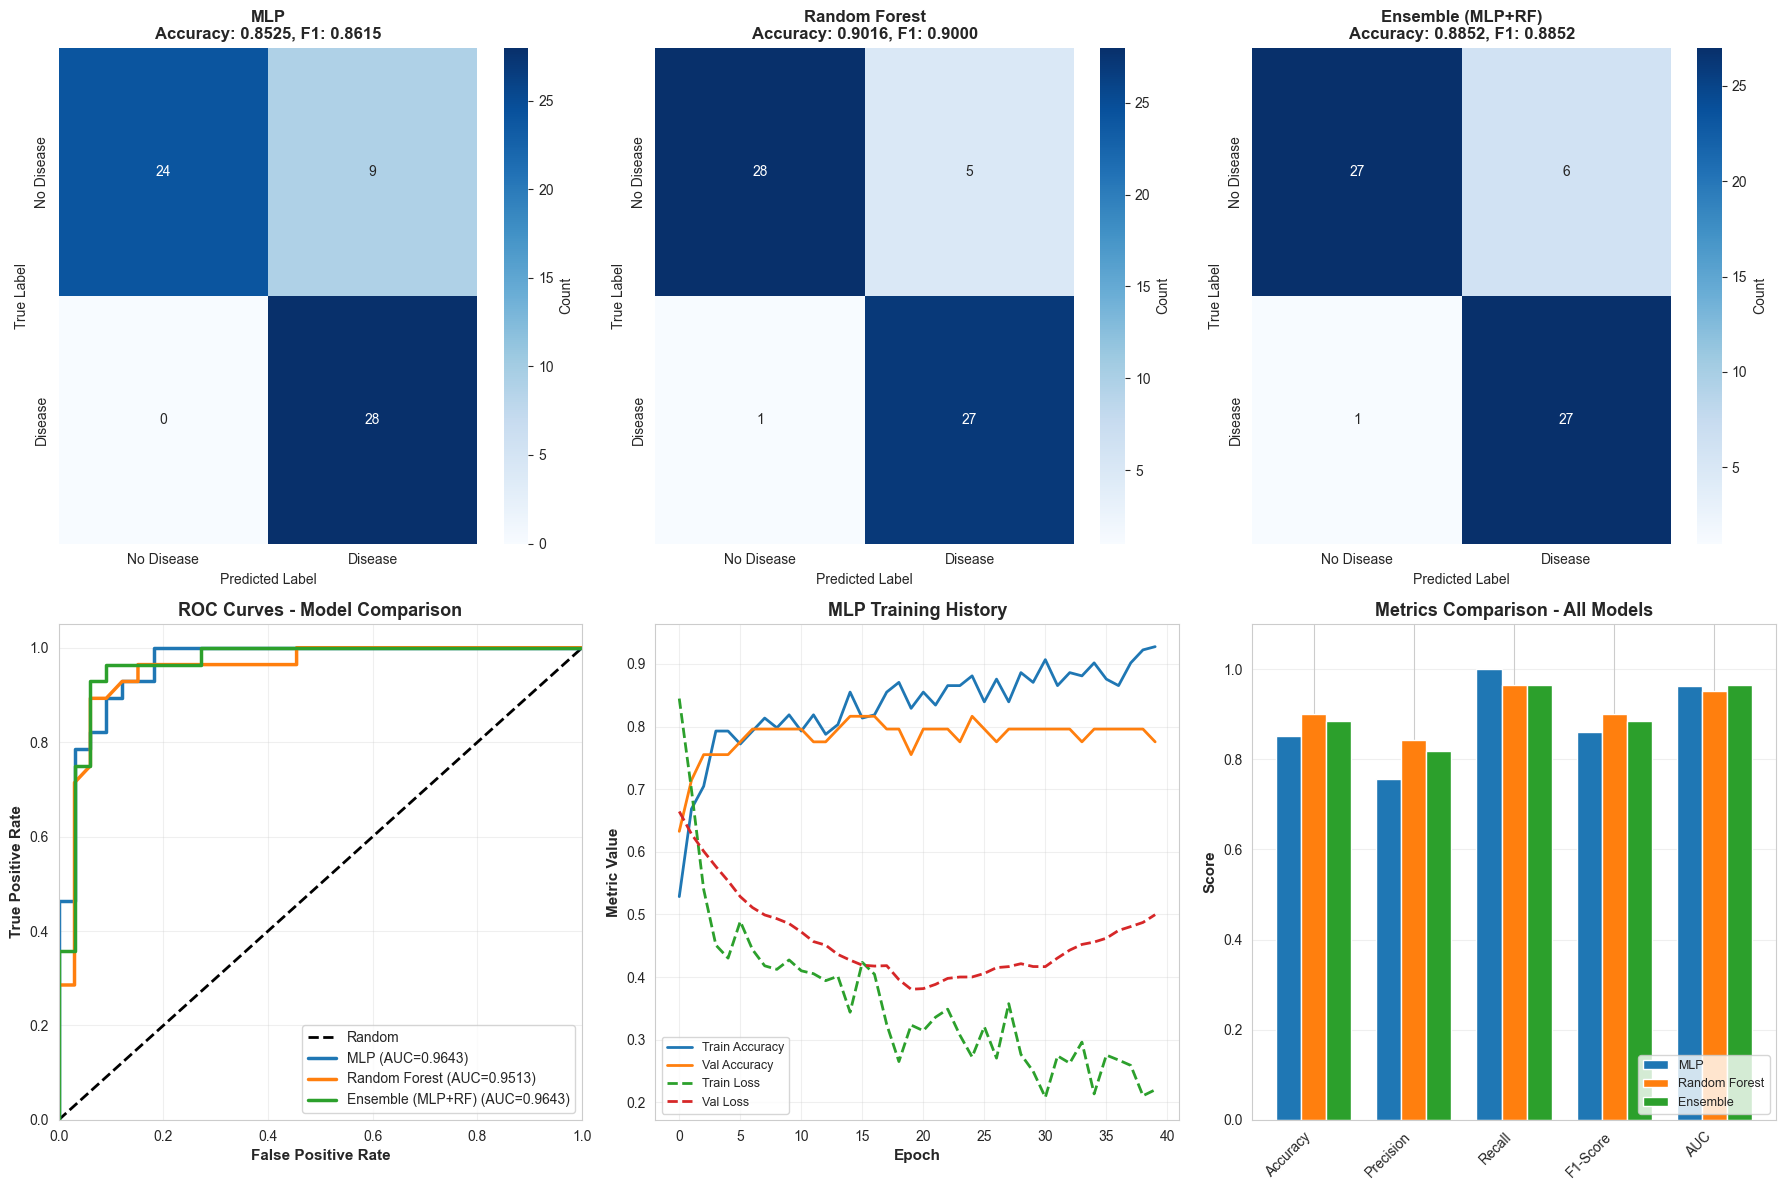

In [22]:
# Create comprehensive comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

models_to_plot = [
    ('MLP', y_pred_mlp, y_pred_proba_mlp, test_acc_mlp, f1_mlp),
    ('Random Forest', y_pred_rf, y_pred_proba_rf, accuracy_score(y_test, y_pred_rf), f1_rf),
    ('Ensemble (MLP+RF)', y_pred_ensemble, y_pred_proba_ensemble, acc_ensemble, f1_ensemble)
]

# Plot confusion matrices
for idx, (name, y_pred, y_pred_proba, acc, f1) in enumerate(models_to_plot):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Count'},
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.4f}, F1: {f1:.4f}',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

# Plot ROC curves
axes[3].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')

for name, y_pred, y_pred_proba, acc, f1 in models_to_plot:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axes[3].plot(fpr, tpr, linewidth=2.5, label=f'{name} (AUC={roc_auc:.4f})')

axes[3].set_xlim([0.0, 1.0])
axes[3].set_ylim([0.0, 1.05])
axes[3].set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
axes[3].set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
axes[3].set_title('ROC Curves - Model Comparison', fontsize=13, fontweight='bold')
axes[3].legend(loc='lower right', fontsize=10)
axes[3].grid(True, alpha=0.3)

# Plot training history
axes[4].plot(history_mlp.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[4].plot(history_mlp.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[4].plot(history_mlp.history['loss'], label='Train Loss', linewidth=2, linestyle='--')
axes[4].plot(history_mlp.history['val_loss'], label='Val Loss', linewidth=2, linestyle='--')
axes[4].set_xlabel('Epoch', fontsize=11, fontweight='bold')
axes[4].set_ylabel('Metric Value', fontsize=11, fontweight='bold')
axes[4].set_title('MLP Training History', fontsize=13, fontweight='bold')
axes[4].legend(loc='best', fontsize=9)
axes[4].grid(True, alpha=0.3)

# Plot metric comparison
metrics_comparison = {
    'MLP': [test_acc_mlp, test_prec_mlp, test_rec_mlp, f1_mlp, test_auc_mlp],
    'Random Forest': [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), 
                      recall_score(y_test, y_pred_rf), f1_rf, roc_auc_score(y_test, y_pred_proba_rf)],
    'Ensemble': [acc_ensemble, prec_ensemble, rec_ensemble, f1_ensemble, auc_ensemble]
}

x = np.arange(5)
width = 0.25
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

for i, (model_name, values) in enumerate(metrics_comparison.items()):
    axes[5].bar(x + i*width, values, width, label=model_name)

axes[5].set_ylabel('Score', fontsize=11, fontweight='bold')
axes[5].set_title('Metrics Comparison - All Models', fontsize=13, fontweight='bold')
axes[5].set_xticks(x + width)
axes[5].set_xticklabels(metric_names, rotation=45, ha='right')
axes[5].legend(loc='lower right', fontsize=9)
axes[5].grid(True, alpha=0.3, axis='y')
axes[5].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('results/day4_main_model_evaluation.png', dpi=300, bbox_inches='tight')
print("✓ Day 4 comprehensive evaluation saved to 'results/day4_main_model_evaluation.png'")
plt.show()

In [24]:
# Save final models and ensemble predictions
print("=" * 70)
print("SAVING FINAL MODELS")
print("=" * 70)

# Save MLP model (already saved by checkpoint)
print(f"✓ MLP model: models/mlp_clinical.keras")

# Save transfer learning model (already saved)
print(f"✓ Transfer Learning model: models/transfer_learning/best_model.keras")

# Save ensemble predictions for deployment
import pickle
ensemble_data = {
    'y_pred_proba': y_pred_proba_ensemble,
    'y_pred': y_pred_ensemble,
    'y_true': y_test.values,
    'metrics': {
        'accuracy': float(acc_ensemble),
        'precision': float(prec_ensemble),
        'recall': float(rec_ensemble),
        'f1': float(f1_ensemble),  # Changed from 'f1_score' to 'f1'
        'auc': float(auc_ensemble)
    }
}

with open('models/ensemble_predictions.pkl', 'wb') as f:
    pickle.dump(ensemble_data, f)

print(f"✓ Ensemble predictions: models/ensemble_predictions.pkl")
print(f"  Accuracy:  {acc_ensemble:.4f}")
print(f"  Precision: {prec_ensemble:.4f}")
print(f"  Recall:    {rec_ensemble:.4f}")
print(f"  F1-Score:  {f1_ensemble:.4f}")
print(f"  AUC:       {auc_ensemble:.4f}")

# Copy best MLP model as main model.h5 for Day 4 deliverable
import shutil
shutil.copy('models/mlp_clinical.keras', 'models/model.h5')
print(f"\n✓ Main model saved as: models/model.h5")

print("\n✅ All Day 4 models saved successfully!")
print("=" * 70)


SAVING FINAL MODELS
✓ MLP model: models/mlp_clinical.keras
✓ Transfer Learning model: models/transfer_learning/best_model.keras
✓ Ensemble predictions: models/ensemble_predictions.pkl
  Accuracy:  0.8852
  Precision: 0.8182
  Recall:    0.9643
  F1-Score:  0.8852
  AUC:       0.9643

✓ Main model saved as: models/model.h5

✅ All Day 4 models saved successfully!


## Section C: Baseline Machine Learning Models

### C1. Traditional ML on Cleveland Dataset

In [9]:
# Baseline ML models - placeholder
# TODO (Day 3): 
# - Logistic Regression
# - Random Forest
# - Gradient Boosting
# - SVM
# - KNN
# - Model comparison

print("Baseline ML models to be implemented in Day 3")

Baseline ML models to be implemented in Day 3


## Section D: Deep Learning Models

### D1. Neural Network for Tabular Data

In [10]:
# Deep Learning on tabular data - placeholder
# TODO (Day 4): 
# - Build fully connected neural network
# - Training with callbacks
# - Hyperparameter tuning

print("DL models for tabular data to be implemented in Day 4")

DL models for tabular data to be implemented in Day 4


### D2. CNN/RNN for ECG Signal Classification

In [ ]:
# Deep Learning on ECG signals - placeholder
# TODO (Day 4-5): 
# - Build CNN for ECG classification
# - Build RNN/LSTM for sequential data
# - Training and validation

print("DL models for ECG signals to be implemented in Days 4-5")

## Section E: Evaluation Metrics and Visualization

### E1. Model Performance Metrics

In [ ]:
# Model evaluation and metrics - placeholder
# TODO (Day 5): 
# - Confusion matrices
# - ROC curves and AUC
# - Precision, Recall, F1-score
# - Model comparison charts

print("Evaluation metrics and visualizations to be implemented in Day 5")

### E2. Results Visualization and Comparison

In [ ]:
# Final comparisons and visualizations - placeholder
# TODO (Day 5): 
# - Compare all models
# - Feature importance plots
# - Learning curves
# - Final recommendations

print("Final visualizations and comparisons to be completed in Day 5")